In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data2 = pd.read_csv("Global_Space_Exploration_Dataset (1).csv")

In [ ]:
data2.head()

,Country,Year,Mission Name,Mission Type,Launch Site,Satellite Type,Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Countries,Duration (in Days)
0,China,2008,Sharable tertiary superstructure,Manned,Sheilatown,Communication,16.20,90,Nuclear Propulsion,Medium,"France, UK, Russia",112
1,Japan,2018,Re-engineered composite flexibility,Manned,New Ericfurt,Communication,29.04,99,Solar Propulsion,High,"Germany, Israel",236
2,Israel,2013,Reactive disintermediate projection,Manned,Port Kaitlynstad,Communication,28.73,54,AI Navigation,Medium,"China, Israel, USA",238
3,UAE,2010,Grass-roots 6thgeneration implementation,Unmanned,Mariastad,Spy,37.27,58,Traditional Rocket,Low,USA,186
4,India,2006,Balanced discrete orchestration,Manned,North Jasonborough,Weather,18.95,91,Solar Propulsion,Medium,"Israel, China, India",277


In [ ]:
data2['Mission Type'].value_counts()

,count
Mission Type,
Manned,1528
Unmanned,1472


In [ ]:
data2.isnull().sum()

,0
Country,0
Year,0
Mission Name,0
Mission Type,0
Launch Site,0
Satellite Type,0
Budget (in Billion $),0
Success Rate (%),0
Technology Used,0
Environmental Impact,0


In [ ]:
data2['Collaborating Countries'].value_counts()

,count
Collaborating Countries,
Germany,115
USA,113
Israel,113
Russia,110
UAE,109
...,...
"Russia, UAE, Japan",1
"Russia, China, Israel",1
"India, Germany, Japan",1


In [ ]:
data2['Duration (in Days)'].value_counts()

,count
Duration (in Days),
307,20
180,16
203,15
13,15
297,14
...,...
54,3
49,3
52,2


In [ ]:
data2.duplicated().sum()

np.int64(0)

In [ ]:
data2.isnull().sum()

,0
Country,0
Year,0
Mission Name,0
Mission Type,0
Launch Site,0
Satellite Type,0
Budget (in Billion $),0
Success Rate (%),0
Technology Used,0
Environmental Impact,0


In [ ]:
data2.describe()

,Year,Budget (in Billion $),Success Rate (%),Duration (in Days)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2012.471000,25.428917,74.985000,181.483000
std,7.437177,14.108438,14.945252,104.983822
min,2000.000000,0.530000,50.000000,1.000000
25%,2006.000000,12.977500,62.000000,91.000000
50%,2012.000000,25.495000,75.000000,180.000000
75%,2019.000000,37.597500,88.000000,272.000000
max,2025.000000,49.970000,100.000000,365.000000


In [ ]:
Q1 = data2[['Budget (in Billion $)', 'Success Rate (%)', 'Duration (in Days)']].quantile(0.25)
Q3 = data2[['Budget (in Billion $)', 'Success Rate (%)', 'Duration (in Days)']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((data2[['Budget (in Billion $)', 'Success Rate (%)', 'Duration (in Days)']] < lower_bound) | (data2[['Budget (in Billion $)', 'Success Rate (%)', 'Duration (in Days)']] > upper_bound))

outliers_count = outliers.sum()
print(f"Outliers Count per Feature:\n{outliers_count}")


Outliers Count per Feature:
Budget (in Billion $)    0
Success Rate (%)         0
Duration (in Days)       0
dtype: int64


In [ ]:
data2.drop(columns=["Mission Name", "Collaborating Countries", "Launch Site","Success Rate (%)", "Budget (in Billion $)", "Country"], inplace=True)

I removed some column will not help the model to prdeict the mission type correctly:
1- Name of the mission because each name is differant and the future mission also will be differant so it does not provide any generalizable pattern for the model to learn from as the model may memorize the name rather than learning actual trends in the data.

2- Collaborating countries, because its consists of complex text  that its containing multiple countries, making it difficult to parse and encode effectively, also we already have a country column that is response about the mission that it will make the model to foces on what country that host really this mission and its enviroment, and if we include this column as a feature it will misinterpret long strings that is more that one country and this will increases complexity without adding clear predictive power.

3- Launch Site, Because thie column have the sites of lunch that contains a high number of unique categorical values (high cardinality) and this high values is more than one site, which make a sparse feature space when one-hot encoded, and will increase model complexity without significantly improving prediction accuracy, also when we think we already have a country feature that is really effect the prediction than the launch site does not logically influence whether a mission is manned or unmanned, so it was excluded to reduce dimensionality and to avoide make too many dummy variables, to avoide make the model overfit or slow down due to unnecessary dimensionality

In [ ]:
data2.head()

,Year,Mission Type,Satellite Type,Technology Used,Environmental Impact,Duration (in Days)
0,2008,Manned,Communication,Nuclear Propulsion,Medium,112
1,2018,Manned,Communication,Solar Propulsion,High,236
2,2013,Manned,Communication,AI Navigation,Medium,238
3,2010,Unmanned,Spy,Traditional Rocket,Low,186
4,2006,Manned,Weather,Solar Propulsion,Medium,277


**Start the EDA** to explore the relation between the target lable (Mission Type) and the other features we have that we can train the model depends on it and will make the predication based on the training

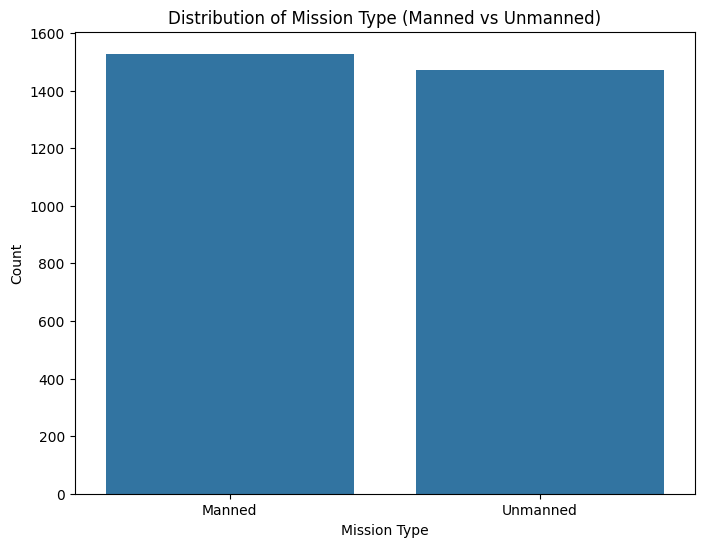

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Mission Type', data=data2)
plt.title('Distribution of Mission Type (Manned vs Unmanned)')
plt.xlabel('Mission Type')
plt.ylabel('Count')
plt.show()

This bar chart represnet how many missions are manned and how many are unmanned, and its like a proof to help us check if the two groups are balanced, and we show that the both number are equals, which is a good thing, It means the model will learn from both types fairly.

This heatmap, show how much each feature are strong with the mission type, and all ot this feature will connect with each other to make the prediction more accurate and correct

**Start the model**

In [ ]:
data2

,Year,Mission Type,Satellite Type,Technology Used,Environmental Impact,Duration (in Days)
0,2008,Manned,Communication,Nuclear Propulsion,Medium,112
1,2018,Manned,Communication,Solar Propulsion,High,236
2,2013,Manned,Communication,AI Navigation,Medium,238
3,2010,Unmanned,Spy,Traditional Rocket,Low,186
4,2006,Manned,Weather,Solar Propulsion,Medium,277
...,...,...,...,...,...,...
2995,2023,Manned,Spy,Traditional Rocket,Medium,338
2996,2009,Manned,Communication,Nuclear Propulsion,Medium,336
2997,2020,Unmanned,Weather,Reusable Rocket,Low,3
2998,2002,Manned,Weather,Solar Propulsion,Low,339


Import the library we need for the KNN model that classify the prediction

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Encoded the target to zero and one, beacuse its a catgeorical feature from two class

In [ ]:
data2["Mission Type"] = data2["Mission Type"].map({"Manned": 1, "Unmanned": 0})

Make sure that its ecoded

In [ ]:
data2

,Year,Mission Type,Satellite Type,Technology Used,Environmental Impact,Duration (in Days)
0,2008,1,Communication,Nuclear Propulsion,Medium,112
1,2018,1,Communication,Solar Propulsion,High,236
2,2013,1,Communication,AI Navigation,Medium,238
3,2010,0,Spy,Traditional Rocket,Low,186
4,2006,1,Weather,Solar Propulsion,Medium,277
...,...,...,...,...,...,...
2995,2023,1,Spy,Traditional Rocket,Medium,338
2996,2009,1,Communication,Nuclear Propulsion,Medium,336
2997,2020,0,Weather,Reusable Rocket,Low,3
2998,2002,1,Weather,Solar Propulsion,Low,339


Separate the columns into target and the feature of preduction

In [ ]:
X = data2.drop("Mission Type", axis=1)
y = data2["Mission Type"]

sepearate the categorical column and numeric column

Make the encodeing for the categorical features that its:
1- Country
2- Satellite Type
3- Technology Used
4- Environmental Impact

And make the scalling for the numeric data

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
categoricalCols = X.select_dtypes(include='object').columns.tolist()
numericCols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

XEncoded = pd.get_dummies(X, columns=categoricalCols)

scaler = MaxAbsScaler()
XEncoded[numericCols] = scaler.fit_transform(XEncoded[numericCols])

In [ ]:
data2

,Year,Mission Type,Satellite Type,Technology Used,Environmental Impact,Duration (in Days)
0,2008,1,Communication,Nuclear Propulsion,Medium,112
1,2018,1,Communication,Solar Propulsion,High,236
2,2013,1,Communication,AI Navigation,Medium,238
3,2010,0,Spy,Traditional Rocket,Low,186
4,2006,1,Weather,Solar Propulsion,Medium,277
...,...,...,...,...,...,...
2995,2023,1,Spy,Traditional Rocket,Medium,338
2996,2009,1,Communication,Nuclear Propulsion,Medium,336
2997,2020,0,Weather,Reusable Rocket,Low,3
2998,2002,1,Weather,Solar Propulsion,Low,339


In [ ]:
XEncoded.head()

,Year,Duration (in Days),Satellite Type_Communication,Satellite Type_Navigation,Satellite Type_Research,Satellite Type_Spy,Satellite Type_Weather,Technology Used_AI Navigation,Technology Used_Nuclear Propulsion,Technology Used_Reusable Rocket,Technology Used_Solar Propulsion,Technology Used_Traditional Rocket,Environmental Impact_High,Environmental Impact_Low,Environmental Impact_Medium
0,0.991605,0.306849,True,False,False,False,False,False,True,False,False,False,False,False,True
1,0.996543,0.646575,True,False,False,False,False,False,False,False,True,False,True,False,False
2,0.994074,0.652055,True,False,False,False,False,True,False,False,False,False,False,False,True
3,0.992593,0.509589,False,False,False,True,False,False,False,False,False,True,False,True,False
4,0.990617,0.758904,False,False,False,False,True,False,False,False,True,False,False,False,True


Start the train and split the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(XEncoded, y, test_size=0.3, random_state=42)

print(f'\nX_train size is :{X_train.shape}')
print(f'X_test size is :{X_test.shape}')
print(f'y_train size is :{y_train.shape}')
print(f'y_test size is :{y_test.shape}')


X_train size is :(2100, 15)
X_test size is :(900, 15)
y_train size is :(2100,)
y_test size is :(900,)


In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


print(f'X_train size is :{X_train_scaled.shape}')
print(f'X_test size is :{X_test_scaled.shape}')
print(f'y_train size is :{y_train.shape}')
print(f'y_test size is :{y_test.shape}')

X_train size is :(2100, 15)
X_test size is :(900, 15)
y_train size is :(2100,)
y_test size is :(900,)


In [ ]:
!pip install mlflow

In [ ]:
import mlflow
import mlflow.sklearn
mlflow.set_experiment("KNN_Mission_Classification")

<Experiment: artifact_location='file:///content/mlruns/704524274740843259', creation_time=1749497248777, experiment_id='704524274740843259', last_update_time=1749497248777, lifecycle_stage='active', name='KNN_Mission_Classification', tags={}>

In [ ]:
accuracy_scores = []
k_range = range(1, len(X_train.columns))

In [ ]:
for k in k_range:
    with mlflow.start_run():
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        mlflow.log_param("K", k)
        mlflow.log_metric("accuracy", acc)
        mlflow.log_metric("precision", prec)
        mlflow.log_metric("recall", rec)
        mlflow.log_metric("f1_score", f1)

        accuracy_scores.append(acc)


In [ ]:
best_k = k_range[accuracy_scores.index(max(accuracy_scores))]
print(f"Best K = {best_k} with accuracy = {max(accuracy_scores):.4f}")

Best K = 6 with accuracy = 0.5189


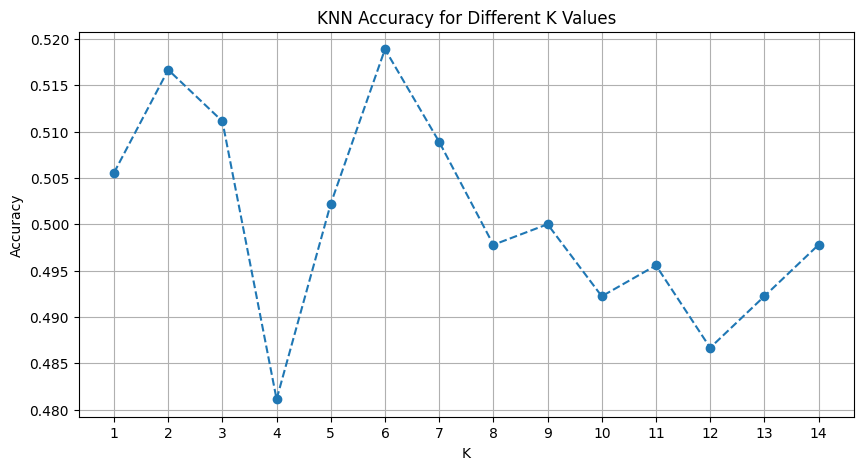

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, accuracy_scores, marker='o', linestyle='--')
plt.title("KNN Accuracy for Different K Values")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.xticks(list(k_range))
plt.grid(True)
plt.show()

2025/06/09 19:28:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Final KNN Model Performance:
Accuracy: 0.5188888888888888
Precision: 0.5660377358490566
Recall: 0.37894736842105264
F1 Score: 0.45397225725094575


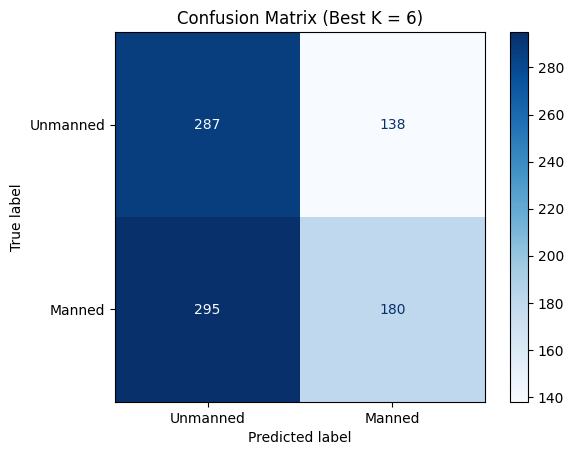

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

with mlflow.start_run(run_name="Best KNN Model"):
    final_knn = KNeighborsClassifier(n_neighbors=best_k)
    final_knn.fit(X_train, y_train)
    y_pred = final_knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    mlflow.log_param("best_k", best_k)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)
    mlflow.sklearn.log_model(final_knn, "best_knn_model")

    print("Final KNN Model Performance:")
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1 Score:", f1)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Unmanned", "Manned"])
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix (Best K = {best_k})")
    plt.show()

In [ ]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)

train_preds = best_knn.predict(X_train)
test_preds = best_knn.predict(X_test)

train_accuracy = accuracy_score(y_train, train_preds)
train_precision = precision_score(y_train, train_preds)
train_recall = recall_score(y_train, train_preds)
train_f1 = f1_score(y_train, train_preds)

print("\nEvaluation on Training Data")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1-Score: {train_f1:.4f}")

test_accuracy = accuracy_score(y_test, test_preds)
test_precision = precision_score(y_test, test_preds)
test_recall = recall_score(y_test, test_preds)
test_f1 = f1_score(y_test, test_preds)

print("\nEvaluation on Test Data")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")

mlflow.log_param("best_k", best_k)
mlflow.log_metrics({
    "train_accuracy": train_accuracy,
    "train_precision": train_precision,
    "train_recall": train_recall,
    "train_f1": train_f1,
    "test_accuracy": test_accuracy,
    "test_precision": test_precision,
    "test_recall": test_recall,
    "test_f1": test_f1})

mlflow.sklearn.log_model(best_knn, "final_knn_model")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(



Evaluation on Training Data
Accuracy: 0.6452
Precision: 0.7104
Recall: 0.4938
F1-Score: 0.5826

Evaluation on Test Data
Accuracy: 0.5189
Precision: 0.5660
Recall: 0.3789
F1-Score: 0.4540


2025/06/09 19:28:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [ ]:
mlflow.end_run()